In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates

In [8]:
%matplotlib inline

In [9]:
data = yf.download("EURUSD=x", period="5d", interval="1h")
data.index = pd.to_datetime(data.index)
data = data.drop(columns=['Adj Close', 'Volume'])
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-08-12 00:00:00+01:00,1.091584,1.091822,1.091584,1.091584
2024-08-12 01:00:00+01:00,1.091584,1.092180,1.091584,1.092180
2024-08-12 02:00:00+01:00,1.092180,1.092657,1.092180,1.092419
2024-08-12 03:00:00+01:00,1.092299,1.092538,1.092061,1.092061
2024-08-12 04:00:00+01:00,1.092180,1.092180,1.091584,1.091584
...,...,...,...,...
2024-08-16 18:00:00+01:00,1.100715,1.101564,1.100715,1.101564
2024-08-16 19:00:00+01:00,1.101564,1.102414,1.101200,1.102414
2024-08-16 20:00:00+01:00,1.102293,1.102779,1.102171,1.102779


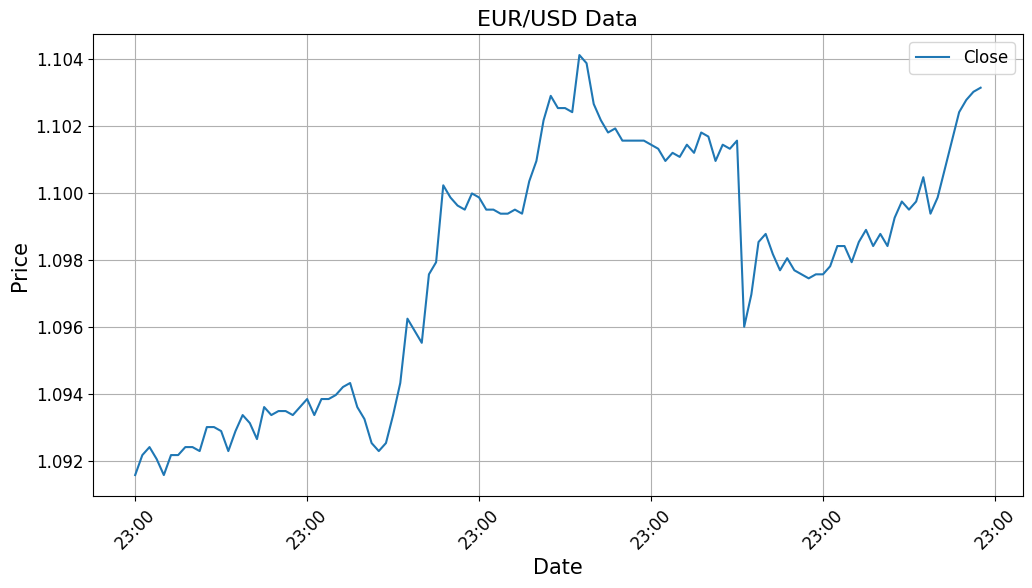

In [10]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['Close'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['Close'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

In [11]:
#Indicators
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import MACD, EMAIndicator, SMAIndicator
from ta.momentum import RSIIndicator, StochasticOscillator

data = dropna(data)

# Initialize MACD Indicator
indicator_macd = MACD(close=data["Close"], window_slow=26, window_fast=12, window_sign=9)

# Add MACD features
data['macd'] = indicator_macd.macd()
data['signal'] = indicator_macd.macd_signal()
data['hist'] = indicator_macd.macd_diff()

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
data['hband'] = indicator_bb.bollinger_hband()
data['lband'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=data["Close"], window=14)

# Add RSI features
data['rsi'] = indicator_rsi.rsi()

# Initialize Stochastic Oscillator
indicator_stoch = StochasticOscillator(high=data["High"], low=data["Low"], close=data["Close"], window=14, smooth_window=3)

# Add Stochastic Oscillator features
data['stoch'] = indicator_stoch.stoch()
data['stoch_signal'] = indicator_stoch.stoch_signal()

# Initialize EMA Indicator
indicator_ema = EMAIndicator(close=data["Close"], window=20)

# Add EMA features
data['ema'] = indicator_ema.ema_indicator()

# Initialize SMA Indicator
indicator_sma = SMAIndicator(close=data["Close"], window=20)

# Add SMA features
data['sma'] = indicator_sma.sma_indicator()


In [12]:
data

,Open,High,Low,Close,macd,signal,hist,hband,lband,rsi,stoch,stoch_signal,ema,sma
Datetime,,,,,,,,,,,,,,
2024-08-12 00:00:00+01:00,1.091584,1.091822,1.091584,1.091584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 01:00:00+01:00,1.091584,1.092180,1.091584,1.092180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 02:00:00+01:00,1.092180,1.092657,1.092180,1.092419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 03:00:00+01:00,1.092299,1.092538,1.092061,1.092061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 04:00:00+01:00,1.092180,1.092180,1.091584,1.091584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16 18:00:00+01:00,1.100715,1.101564,1.100715,1.101564,0.000411,0.000085,0.000326,1.101160,1.096946,64.559385,100.000000,89.838165,1.099530,1.099053
2024-08-16 19:00:00+01:00,1.101564,1.102414,1.101200,1.102414,0.000584,0.000185,0.000400,1.101750,1.096840,68.259330,100.000000,100.000000,1.099805,1.099295
2024-08-16 20:00:00+01:00,1.102293,1.102779,1.102171,1.102779,0.000743,0.000296,0.000446,1.102311,1.096800,69.720171,100.000000,100.000000,1.100088,1.099555


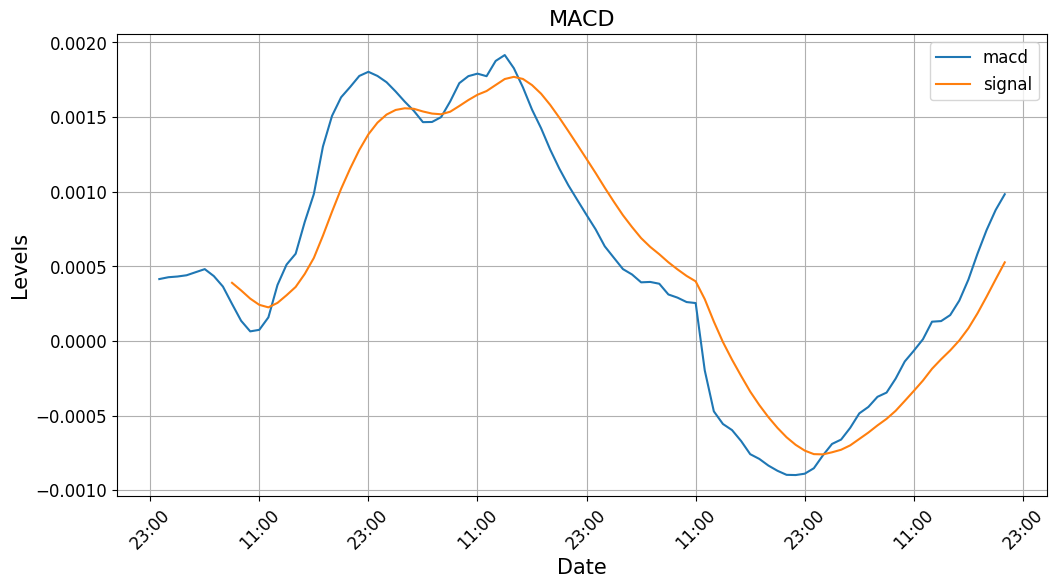

In [13]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['macd'])
ax.plot(data.index, data['signal'])
# ax.hist(data['hist'], bins = 10, edgecolor='black')


# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('MACD', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['macd', 'signal', 'hist'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

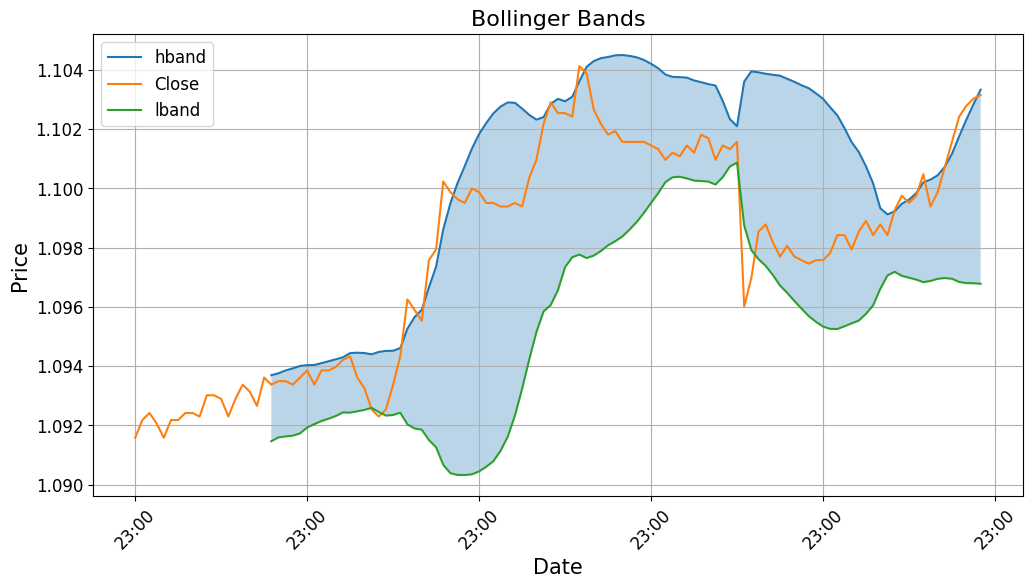

In [14]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['hband'])
ax.plot(data.index, data['Close'])
ax.plot(data.index, data['lband'])
ax.fill_between(data.index, data['hband'], data['lband'], alpha=0.3)

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Bollinger Bands', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['hband', 'Close', 'lband'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

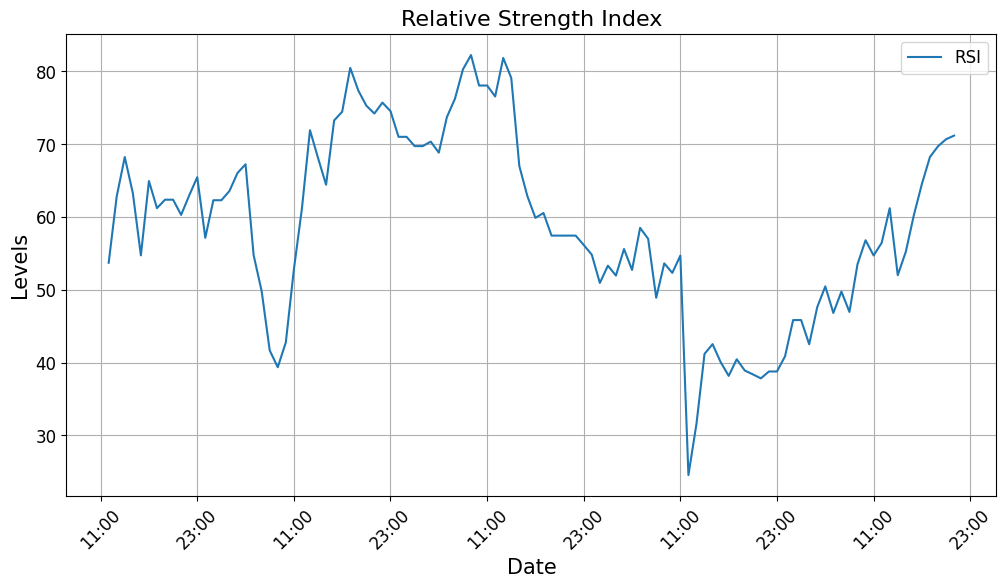

In [15]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['rsi'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Relative Strength Index', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['RSI' ], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

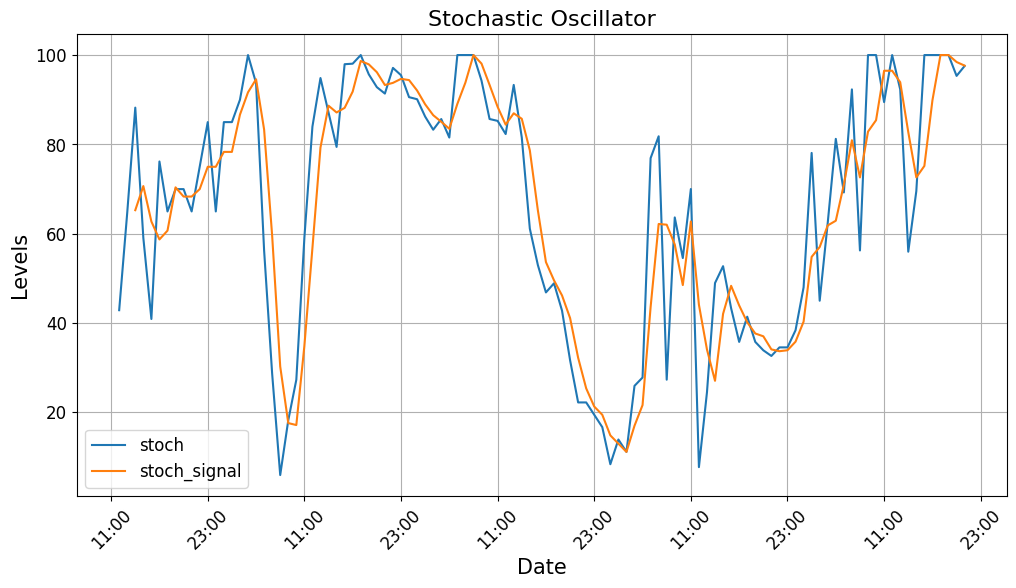

In [16]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['stoch'])
ax.plot(data.index, data['stoch_signal'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Stochastic Oscillator', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['stoch','stoch_signal' ], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()